In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

• There are different python libraries used in this notebook in order to not install them you can use google colab and upload the data set on it 

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
filename = 'daily_weather_data.csv'
df = pd.read_csv(filename, date_parser=['date'])
df.head()

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
0,21-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6
1,22-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0
2,23-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7
3,24-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4
4,25-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0


Data cleaning

In [6]:
df = df.drop_duplicates(keep='first')
df.head()

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
0,21-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6
1,22-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0
2,23-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7
3,24-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4
4,25-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0


In [8]:
df.sort_values(by=['date'], inplace=True)
df.reset_index(inplace=True, drop=True)

In [9]:
df = df.drop(columns=['country','city', 'Latitude', 'Longitude', 'date'])
print(df.isnull().sum(axis=0) * 100/len(df))

tavg     2.982932
tmin     3.808136
tmax     3.812757
wdir    12.539774
wspd     6.852674
pres    10.852095
dtype: float64


In [10]:
df = df[df['wdir'].notna()]
df = df[df['pres'].notna()]
df = df[df['wspd'].notna()]
df = df[df['tavg'].notna()]

In [19]:
df = df[df['tmax'] <= 60]
df = df[df['wspd'] <= 70]
df = df[df['pres'] <= 1050]
df = df[df['pres'] > 950]
df.reset_index(inplace=True, drop=True)
print(df.describe(include='all'))

                tavg           tmin           tmax           wdir  \
count  277526.000000  277526.000000  277526.000000  277526.000000   
mean       20.819040      17.224847      24.817356     164.463257   
std         9.347579       9.401243       9.848047     102.068663   
min       -29.600000     -31.700000     -26.000000       0.000000   
25%        15.100000      10.900000      19.200000      81.000000   
50%        24.900000      20.900000      28.500000     144.000000   
75%        27.400000      24.500000      31.200000     251.000000   
max        44.100000      38.500000      59.800000     360.000000   

                wspd           pres  
count  277526.000000  277526.000000  
mean       13.444706    1013.294971  
std         7.326667       7.181556  
min         0.000000     953.700000  
25%         8.200000    1009.900000  
50%        11.800000    1013.000000  
75%        17.100000    1016.800000  
max        69.900000    1049.700000  


Q-Q plots and Histograms 

In [22]:
from sklearn.preprocessing import FunctionTransformer

# squre root transformation for 'wspd'
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
data_transformed = sqrt_transformer.transform(df[['wspd']])
df['t_wspd'] = data_transformed
# power transformation with power of 2 for 'pres'
power_transformer = FunctionTransformer(lambda x: x**2, validate=True)
data_transformed = power_transformer.transform(df[['pres']])
df['t-pres'] = data_transformed


c:\Users\Surface\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
c:\Users\Surface\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


Split data as train and test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_data = df.drop('tavg', axis=1)

df_target = pd.DataFrame(df['tavg'], columns=['tavg'])
x_train, x_test, y_train, y_test = train_test_split(
    df_data, df_target, test_size=0.2, random_state=42)

Data Scaling/Standardization


In [26]:
std_columns = ['tmin','tmax','wdir','pres']

In [27]:
from sklearn.preprocessing import StandardScaler
# for feature data
scaler_train = StandardScaler()
scaler_train.fit(x_train[std_columns])

StandardScaler()

In [28]:
x_train_scaled = scaler_train.transform(x_train[std_columns])
x_test_scaled = scaler_train.transform(x_test[std_columns])
df_x_train_standardized = pd.DataFrame(x_train_scaled, columns = std_columns)
df_x_test_standardized = pd.DataFrame(x_test_scaled, columns = std_columns)

In [29]:
# for target data
scaler_target = StandardScaler()
scaler_target.fit(y_train)
y_train_scaled = scaler_target.transform(y_train)
y_test_scaled = scaler_target.transform(y_test)
df_y_train_standardized = pd.DataFrame(y_train_scaled, columns = ['tavg'])
df_y_test_standardized = pd.DataFrame(y_test_scaled, columns = ['tavg'])

In [31]:
from sklearn.decomposition import PCA

In [32]:

pca = PCA()
pca.fit(x_train)


PCA()

In [33]:
pca.explained_variance_ratio_

array([9.99949891e-01, 4.90449426e-05, 7.77183868e-07, 2.53782634e-07,
       3.27989835e-08, 1.30268486e-10, 1.41057024e-11])

In [34]:
df_data = df.drop('tavg', axis=1)
df_target = pd.DataFrame(df['tavg'], columns=['tavg'])
x_train, x_test, y_train, y_test = train_test_split(
    df_data, df_target, test_size=0.2, random_state=42)

In [35]:
pca = PCA(n_components=5)
pca.fit(x_train)
pca_x_train = pca.transform(x_train)
pca_x_test = pca.transform(x_test)
print(x_train)

        tmin  tmax   wdir  wspd    pres    t_wspd      t-pres
216251  23.5  31.0   93.0   8.4  1014.1  2.898275  1028398.81
9570     1.5  10.9  354.0   6.5  1021.0  2.549510  1042441.00
176470  25.6  35.6  186.0   7.2  1007.6  2.683282  1015257.76
193028  -0.4   4.6  192.0  15.5  1017.7  3.937004  1035713.29
46839   23.6  32.6  166.0  13.0  1011.3  3.605551  1022727.69
...      ...   ...    ...   ...     ...       ...         ...
119879   6.8  11.9  259.0  16.0  1013.6  4.000000  1027384.96
259178  24.4  36.4   66.0   7.1  1010.9  2.664583  1021918.81
131932  16.2  26.2   40.0   3.4  1017.5  1.843909  1035306.25
146867  -7.0   0.6  268.0  20.2   995.9  4.494441   991816.81
121958  17.7  19.6   12.0  37.4  1008.0  6.115554  1016064.00

[222020 rows x 7 columns]


In [36]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [37]:
model = lm.fit(x_train, y_train)

In [38]:
predictions = lm.predict(x_train)
y_train_pred = pd.DataFrame(predictions, columns=['Predicted Apparent Temperature (C)'])

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [40]:
# Mean Squred Error
mse = mean_squared_error(y_train, y_train_pred)
print('Mean squared error(Train) :', round(mse, 4))

Mean squared error(Train) : 0.6985


In [41]:
# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_train, y_train_pred))
print('Root mean squared error(Train) :', round(rmsq, 4))

Root mean squared error(Train) : 0.8357


In [42]:
# Accuracy
score = lm.score(x_train, y_train)
print('Explained variance of the predictions(Train) :', round(score * 100, 4))

Explained variance of the predictions(Train) : 99.2001


In [43]:
predictions = lm.predict(x_test)
y_pred = pd.DataFrame(predictions, columns=['Predicted Apparent Temperature (C)'])

In [44]:
# Mean Squred Error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error(Testing) :', round(mse, 4))


Mean squared error(Testing) : 0.7036


In [45]:
# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_test, y_pred))
print('Root mean squared error(Testing) :', round(rmsq, 4))

# Accuracy
score = lm.score(x_test, y_test)
print('Explained variance of the predictions(Testing) :', round(score * 100, 4))

Root mean squared error(Testing) : 0.8388
Explained variance of the predictions(Testing) : 99.1969


In [46]:
sns.set(rc={'figure.figsize':(20,10)})

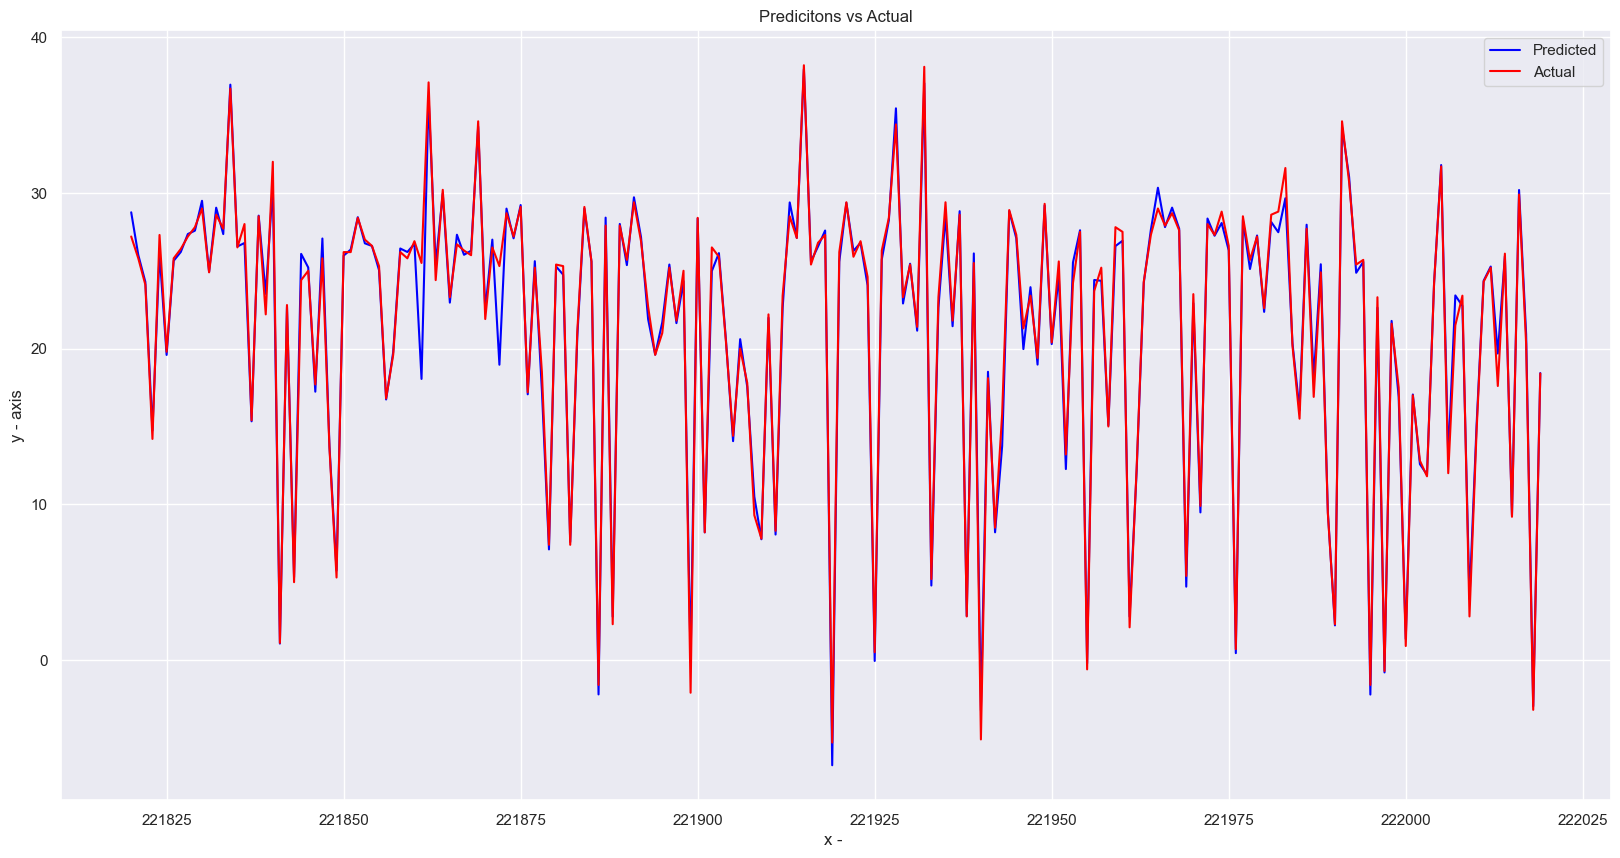

In [47]:
predictions = lm.predict(x_train)
y_train_pred_1=y_train_pred.reset_index(drop=True)
y_train_1=y_train.reset_index(drop=True)
